In [109]:
import sys
import scipy.io.wavfile as wavfile
from scipy import signal
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftshift
from scipy.fftpack import fft

from scipy.signal import butter, lfilter, freqz


sys.path.append('/Users/carleen/Documents/misc_code/encore/')

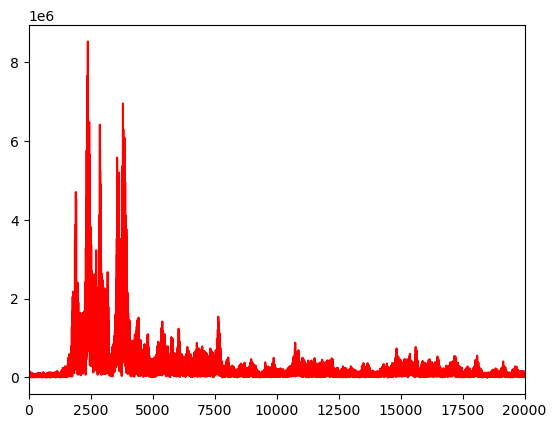

In [96]:
filename = '../samples/New_Recording_4.wav'
samplerate, data = wavfile.read(filename)
length = data.shape[0] / samplerate

time = np.linspace(0., length, data.shape[0])

# Normalize the signal
normsig = [(ele/2**8.)*2-1 for ele in data]

# Convert to np array
normsig_arr = np.array(normsig)
fft_sig = fft(normsig)
length_fft = int(len(fft_sig)/2)
plt.plot(abs(fft_sig[0:(length_fft-1)]),'r') 
plt.xlim([0,20e3])
plt.show()

/var/folders/n2/rzvcppnn3s74tcmyzvm37h_80000gn/T/ipykernel_8913/2293529232.py:3: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(t, f, np.log(Sxx), shading='gouraud')


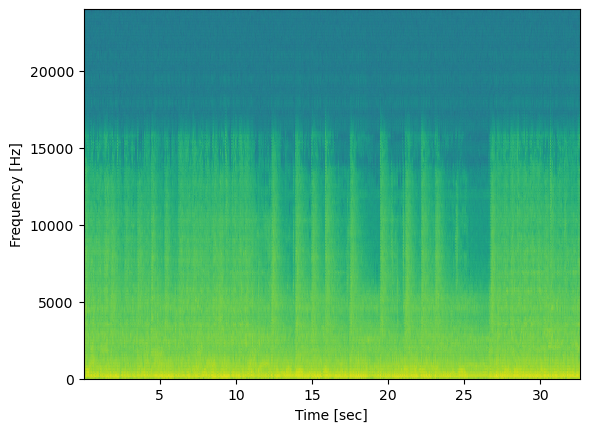

In [110]:
f, t, Sxx = signal.spectrogram(data, samplerate)

plt.pcolormesh(t, f, np.log(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [108]:
Sxx

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.8438010e+06,
        1.9600132e+06, 2.4603377e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.0855496e+07,
        2.0479412e+07, 4.0640268e+06],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.5957465e+06,
        4.4624070e+06, 4.4063060e+06],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.2772331e-05,
        2.7291605e-04, 2.1489691e-03],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.1205053e-03,
        8.3477120e-04, 1.0074036e-04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3981231e-04,
        1.3463708e-03, 1.4853136e-03]], dtype=float32)

In [86]:
normsig_arr = np.array(normsig)
normsig_arr.shape

(1563648,)